In [ ]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
import numpy as np

# Data Science Project - Data Preprocessing

## Crime and Resilience dataset:

In [ ]:
!pip install xlsx2csv
df_crime = pl.read_excel("global_oc_index.xlsx",sheet_id=3)

In [ ]:
df_crime

shape: (193, 33)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Continent ┆ Region    ┆ Country   ┆ Criminali ┆ … ┆ Economic  ┆ Victim    ┆ Preventio ┆ Non-stat │
│ ---       ┆ ---       ┆ ---       ┆ ty        ┆   ┆ regulator ┆ and       ┆ n         ┆ e actors │
│ str       ┆ str       ┆ str       ┆ ---       ┆   ┆ y         ┆ witness   ┆ ---       ┆ ---      │
│           ┆           ┆           ┆ f64       ┆   ┆ capacity  ┆ support   ┆ f64       ┆ f64      │
│           ┆           ┆           ┆           ┆   ┆ ---       ┆ ---       ┆           ┆          │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ f64       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Asia      ┆ Western   ┆ Turkey    ┆ 6.89      ┆ … ┆ 4.0       ┆ 4.0       ┆ 3.5       ┆ 3.5      │
│           ┆ Asia      ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Africa    ┆ West      ┆ Cabo      ┆ 4.04      ┆ … ┆ 6.0       ┆ 3.5       ┆ 6.0       ┆ 7.0      │
│           ┆ Africa    ┆ Verde     ┆           ┆   ┆           ┆           ┆           ┆          │
│ Africa    ┆ Southern  ┆ South     ┆ 6.63      ┆ … ┆ 6.0       ┆ 4.0       ┆ 5.0       ┆ 7.0      │
│           ┆ Africa    ┆ Africa    ┆           ┆   ┆           ┆           ┆           ┆          │
│ Americas  ┆ South     ┆ Colombia  ┆ 7.66      ┆ … ┆ 5.0       ┆ 3.5       ┆ 4.5       ┆ 6.5      │
│           ┆ America   ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ Americas  ┆ Caribbean ┆ St.       ┆ 3.3       ┆ … ┆ 4.0       ┆ 3.0       ┆ 6.0       ┆ 6.0      │
│           ┆           ┆ Vincent   ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ and the   ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ Grenadine ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ s         ┆           ┆   ┆           ┆           ┆           ┆          │
│ Europe    ┆ Central & ┆ Slovenia  ┆ 4.29      ┆ … ┆ 5.0       ┆ 6.0       ┆ 6.0       ┆ 6.0      │
│           ┆ Eastern   ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆ Europe    ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Americas  ┆ Caribbean ┆ St. Lucia ┆ 4.09      ┆ … ┆ 5.5       ┆ 5.0       ┆ 6.0       ┆ 4.0      │
│ Americas  ┆ Caribbean ┆ Dominica  ┆ 2.63      ┆ … ┆ 5.0       ┆ 5.0       ┆ 6.0       ┆ 5.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [ ]:
df_crime.null_count()

shape: (1, 33)
┌───────────┬────────┬─────────┬────────────┬───┬────────────┬────────────┬────────────┬───────────┐
│ Continent ┆ Region ┆ Country ┆ Criminalit ┆ … ┆ Economic   ┆ Victim and ┆ Prevention ┆ Non-state │
│ ---       ┆ ---    ┆ ---     ┆ y          ┆   ┆ regulatory ┆ witness    ┆ ---        ┆ actors    │
│ u32       ┆ u32    ┆ u32     ┆ ---        ┆   ┆ capacity   ┆ support    ┆ u32        ┆ ---       │
│           ┆        ┆         ┆ u32        ┆   ┆ ---        ┆ ---        ┆            ┆ u32       │
│           ┆        ┆         ┆            ┆   ┆ u32        ┆ u32        ┆            ┆           │
╞═══════════╪════════╪═════════╪════════════╪═══╪════════════╪════════════╪════════════╪═══════════╡
│ 0         ┆ 0      ┆ 0       ┆ 0          ┆ … ┆ 0          ┆ 0          ┆ 0          ┆ 0         │
└───────────┴────────┴─────────┴────────────┴───┴────────────┴────────────┴────────────┴───────────┘

## Functions to convert the unusable UN Data format to a normal dataframe format:

In [ ]:
def to_row(key, group):
    row = {"Country":key[0], "Year":key[1]}
    row.update({row[3]:float(row[4].replace(",","")) for row in group.iter_rows()})
    return row

def undata_to_df(path):
    df = pl.read_csv(path, encoding="utf8-lossy", skip_rows=1, new_columns=["id","Country"])
    df_country_data = pl.from_dicts([to_row(key,group) for key, group in df.group_by(df.columns[1:3])])
    return df_country_data

## Converting the population dataset:

In [ ]:
df_population = undata_to_df("SYB66_1_202310_Population, Surface Area and Density.csv").sort(by=["Country", "Surface area (thousand km2)"])
df_population = df_population.rename({"Year" : "Year_pop"})
df_population

shape: (1_060, 10)
┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country   ┆ Year_pop ┆ Populatio ┆ Populatio ┆ … ┆ Populatio ┆ Populatio ┆ Populatio ┆ Surface   │
│ ---       ┆ ---      ┆ n         ┆ n         ┆   ┆ n aged 0  ┆ n aged    ┆ n density ┆ area      │
│ str       ┆ i64      ┆ mid-year  ┆ mid-year  ┆   ┆ to 14     ┆ 60+ years ┆ ---       ┆ (thousand │
│           ┆          ┆ estimates ┆ estimates ┆   ┆ years ol… ┆ old (p…   ┆ f64       ┆ km2)      │
│           ┆          ┆ (m…       ┆ fo…       ┆   ┆ ---       ┆ ---       ┆           ┆ ---       │
│           ┆          ┆ ---       ┆ ---       ┆   ┆ f64       ┆ f64       ┆           ┆ f64       │
│           ┆          ┆ f64       ┆ f64       ┆   ┆           ┆           ┆           ┆           │
╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Afghanist ┆ 2015     ┆ 33.75     ┆ 17.07     ┆ … ┆ 45.8      ┆ 3.8       ┆ 52.0      ┆ null      │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2010     ┆ 28.19     ┆ 14.24     ┆ … ┆ 49.0      ┆ 3.8       ┆ 43.4      ┆ null      │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2022     ┆ 41.13     ┆ 20.77     ┆ … ┆ 43.1      ┆ 3.8       ┆ 63.3      ┆ null      │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2021     ┆ 40.1      ┆ 20.25     ┆ … ┆ 43.4      ┆ 3.8       ┆ 61.8      ┆ 653.0     │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ …         ┆ …        ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ Zimbabwe  ┆ 2010     ┆ 12.84     ┆ 6.03      ┆ … ┆ 43.2      ┆ 4.6       ┆ 33.2      ┆ null      │
│ Zimbabwe  ┆ 2015     ┆ 14.15     ┆ 6.65      ┆ … ┆ 42.9      ┆ 4.9       ┆ 36.6      ┆ null      │
│ Zimbabwe  ┆ 2022     ┆ 16.32     ┆ 7.71      ┆ … ┆ 40.6      ┆ 4.8       ┆ 42.2      ┆ null      │
│ Zimbabwe  ┆ 2021     ┆ 15.99     ┆ 7.54      ┆ … ┆ 40.9      ┆ 4.9       ┆ 41.3      ┆ 391.0     │
└───────────┴──────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [ ]:
df_population.null_count()

shape: (1, 10)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country ┆ Year_pop ┆ Population ┆ Population ┆ … ┆ Populatio ┆ Populatio ┆ Populatio ┆ Surface   │
│ ---     ┆ ---      ┆ mid-year   ┆ mid-year   ┆   ┆ n aged 0  ┆ n aged    ┆ n density ┆ area      │
│ u32     ┆ u32      ┆ estimates  ┆ estimates  ┆   ┆ to 14     ┆ 60+ years ┆ ---       ┆ (thousand │
│         ┆          ┆ (m…        ┆ fo…        ┆   ┆ years ol… ┆ old (p…   ┆ u32       ┆ km2)      │
│         ┆          ┆ ---        ┆ ---        ┆   ┆ ---       ┆ ---       ┆           ┆ ---       │
│         ┆          ┆ u32        ┆ u32        ┆   ┆ u32       ┆ u32       ┆           ┆ u32       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ 0        ┆ 4          ┆ 4          ┆ … ┆ 4         ┆ 4         ┆ 0         ┆ 804       │
└─────────┴──────────┴────────────┴────────────┴───┴───────────┴───────────┴───────────┴───────────┘

### Only one year per country contains it's surface area:

In [ ]:
df_population = df_population.with_columns(pl.col("Surface area (thousand km2)").fill_null(strategy="backward"))
df_population

shape: (1_060, 10)
┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country   ┆ Year_pop ┆ Populatio ┆ Populatio ┆ … ┆ Populatio ┆ Populatio ┆ Populatio ┆ Surface   │
│ ---       ┆ ---      ┆ n         ┆ n         ┆   ┆ n aged 0  ┆ n aged    ┆ n density ┆ area      │
│ str       ┆ i64      ┆ mid-year  ┆ mid-year  ┆   ┆ to 14     ┆ 60+ years ┆ ---       ┆ (thousand │
│           ┆          ┆ estimates ┆ estimates ┆   ┆ years ol… ┆ old (p…   ┆ f64       ┆ km2)      │
│           ┆          ┆ (m…       ┆ fo…       ┆   ┆ ---       ┆ ---       ┆           ┆ ---       │
│           ┆          ┆ ---       ┆ ---       ┆   ┆ f64       ┆ f64       ┆           ┆ f64       │
│           ┆          ┆ f64       ┆ f64       ┆   ┆           ┆           ┆           ┆           │
╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Afghanist ┆ 2015     ┆ 33.75     ┆ 17.07     ┆ … ┆ 45.8      ┆ 3.8       ┆ 52.0      ┆ 653.0     │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2010     ┆ 28.19     ┆ 14.24     ┆ … ┆ 49.0      ┆ 3.8       ┆ 43.4      ┆ 653.0     │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2022     ┆ 41.13     ┆ 20.77     ┆ … ┆ 43.1      ┆ 3.8       ┆ 63.3      ┆ 653.0     │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2021     ┆ 40.1      ┆ 20.25     ┆ … ┆ 43.4      ┆ 3.8       ┆ 61.8      ┆ 653.0     │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ …         ┆ …        ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ Zimbabwe  ┆ 2010     ┆ 12.84     ┆ 6.03      ┆ … ┆ 43.2      ┆ 4.6       ┆ 33.2      ┆ 391.0     │
│ Zimbabwe  ┆ 2015     ┆ 14.15     ┆ 6.65      ┆ … ┆ 42.9      ┆ 4.9       ┆ 36.6      ┆ 391.0     │
│ Zimbabwe  ┆ 2022     ┆ 16.32     ┆ 7.71      ┆ … ┆ 40.6      ┆ 4.8       ┆ 42.2      ┆ 391.0     │
│ Zimbabwe  ┆ 2021     ┆ 15.99     ┆ 7.54      ┆ … ┆ 40.9      ┆ 4.9       ┆ 41.3      ┆ 391.0     │
└───────────┴──────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

### Removing some missing values that do not appear in the crime dataset so they are not useful:

In [ ]:
print(df_population.filter(pl.col("Population mid-year estimates (millions)").is_null()))
print(df_crime.filter(pl.col("Country") == "Holy See").select(pl.count()))

shape: (4, 10)
┌──────────┬──────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country  ┆ Year_pop ┆ Population ┆ Populatio ┆ … ┆ Populatio ┆ Populatio ┆ Populatio ┆ Surface   │
│ ---      ┆ ---      ┆ mid-year   ┆ n         ┆   ┆ n aged 0  ┆ n aged    ┆ n density ┆ area      │
│ str      ┆ i64      ┆ estimates  ┆ mid-year  ┆   ┆ to 14     ┆ 60+ years ┆ ---       ┆ (thousand │
│          ┆          ┆ (m…        ┆ estimates ┆   ┆ years ol… ┆ old (p…   ┆ f64       ┆ km2)      │
│          ┆          ┆ ---        ┆ fo…       ┆   ┆ ---       ┆ ---       ┆           ┆ ---       │
│          ┆          ┆ f64        ┆ ---       ┆   ┆ f64       ┆ f64       ┆           ┆ f64       │
│          ┆          ┆            ┆ f64       ┆   ┆           ┆           ┆           ┆           │
╞══════════╪══════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Holy See ┆ 2010     ┆ null       ┆ null      ┆ … ┆ null      ┆ null      ┆

In [ ]:
df_population = df_population.drop_nulls()
df_population.null_count()

shape: (1, 10)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country ┆ Year_pop ┆ Population ┆ Population ┆ … ┆ Populatio ┆ Populatio ┆ Populatio ┆ Surface   │
│ ---     ┆ ---      ┆ mid-year   ┆ mid-year   ┆   ┆ n aged 0  ┆ n aged    ┆ n density ┆ area      │
│ u32     ┆ u32      ┆ estimates  ┆ estimates  ┆   ┆ to 14     ┆ 60+ years ┆ ---       ┆ (thousand │
│         ┆          ┆ (m…        ┆ fo…        ┆   ┆ years ol… ┆ old (p…   ┆ u32       ┆ km2)      │
│         ┆          ┆ ---        ┆ ---        ┆   ┆ ---       ┆ ---       ┆           ┆ ---       │
│         ┆          ┆ u32        ┆ u32        ┆   ┆ u32       ┆ u32       ┆           ┆ u32       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ 0        ┆ 0          ┆ 0          ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0         │
└─────────┴──────────┴────────────┴────────────┴───┴───────────┴───────────┴───────────┴───────────┘

### Trying data selection by mean or by most recent

In [ ]:
df_population_last = df_population.group_by('Country').agg([
    pl.all().sort_by('Year_pop').last(),
])
df_population_mean = df_population.group_by('Country').agg([
    pl.all().mean(),
])

## GDP dataset:

In [ ]:
df_gdp = undata_to_df("SYB66_230_202310_GDP and GDP Per Capita.csv")
df_gdp = df_gdp.rename({"Year" : "Year_gdp"})
df_gdp

shape: (1_695, 6)
┌─────────────────┬──────────┬─────────────────┬─────────────────┬────────────────┬────────────────┐
│ Country         ┆ Year_gdp ┆ GDP in current  ┆ GDP per capita  ┆ GDP in         ┆ GDP real rates │
│ ---             ┆ ---      ┆ prices          ┆ (US dollars)    ┆ constant 2015  ┆ of growth      │
│ str             ┆ i64      ┆ (millions …     ┆ ---             ┆ prices (mil…   ┆ (percen…       │
│                 ┆          ┆ ---             ┆ f64             ┆ ---            ┆ ---            │
│                 ┆          ┆ f64             ┆                 ┆ f64            ┆ f64            │
╞═════════════════╪══════════╪═════════════════╪═════════════════╪════════════════╪════════════════╡
│ Total, all      ┆ 1995     ┆ 3.1269041e7     ┆ 5446.0          ┆ 4.0355817e7    ┆ 3.1            │
│ countries or    ┆          ┆                 ┆                 ┆                ┆                │
│ areas           ┆          ┆                 ┆                 ┆                ┆                │
│ Total, all      ┆ 2005     ┆ 4.7775404e7     ┆ 7287.0          ┆ 5.6455926e7    ┆ 4.0            │
│ countries or    ┆          ┆                 ┆                 ┆                ┆                │
│ areas           ┆          ┆                 ┆                 ┆                ┆                │
│ Total, all      ┆ 2010     ┆ 6.6578017e7     ┆ 9533.0          ┆ 6.4907975e7    ┆ 4.5            │
│ countries or    ┆          ┆                 ┆                 ┆                ┆                │
│ areas           ┆          ┆                 ┆                 ┆                ┆                │
│ Total, all      ┆ 2019     ┆ 8.7728744e7     ┆ 11301.0         ┆ 8.4504873e7    ┆ 2.5            │
│ countries or    ┆          ┆                 ┆                 ┆                ┆                │
│ areas           ┆          ┆                 ┆                 ┆                ┆                │
│ …               ┆ …        ┆ …               ┆ …               ┆ …              ┆ …              │
│ Zimbabwe        ┆ 2005     ┆ 7189.0          ┆ 588.0           ┆ 8316.0         ┆ -4.1           │
│ Zimbabwe        ┆ 2010     ┆ 12042.0         ┆ 938.0           ┆ 14100.0        ┆ 19.7           │
│ Zimbabwe        ┆ 2019     ┆ 22595.0         ┆ 1472.0          ┆ 20705.0        ┆ -6.1           │
│ Zimbabwe        ┆ 2020     ┆ 21665.0         ┆ 1383.0          ┆ 19608.0        ┆ -5.3           │
└─────────────────┴──────────┴─────────────────┴─────────────────┴────────────────┴────────────────┘

In [ ]:
df_gdp.null_count()

shape: (1, 6)
┌─────────┬──────────┬───────────────────┬───────────────────┬──────────────────┬──────────────────┐
│ Country ┆ Year_gdp ┆ GDP in current    ┆ GDP per capita    ┆ GDP in constant  ┆ GDP real rates   │
│ ---     ┆ ---      ┆ prices (millions  ┆ (US dollars)      ┆ 2015 prices      ┆ of growth        │
│ u32     ┆ u32      ┆ …                 ┆ ---               ┆ (mil…            ┆ (percen…         │
│         ┆          ┆ ---               ┆ u32               ┆ ---              ┆ ---              │
│         ┆          ┆ u32               ┆                   ┆ u32              ┆ u32              │
╞═════════╪══════════╪═══════════════════╪═══════════════════╪══════════════════╪══════════════════╡
│ 0       ┆ 0        ┆ 0                 ┆ 1                 ┆ 1                ┆ 3                │
└─────────┴──────────┴───────────────────┴───────────────────┴──────────────────┴──────────────────┘

### Removing some missing values that do not appear in the crime dataset so they are not useful:

In [ ]:
print(df_gdp.filter(pl.col("GDP real rates of growth (percent)").is_null()))
print(df_crime.filter(pl.col("Country") == "Curaçao").select(pl.count()))
print(df_crime.filter(pl.col("Country") == "Sint Maarten (Dutch part)").select(pl.count()))
print(df_crime.filter(pl.col("Country") == "Sint Maarten").select(pl.count()))

shape: (3, 6)
┌─────────────────┬──────────┬─────────────────┬─────────────────┬────────────────┬────────────────┐
│ Country         ┆ Year_gdp ┆ GDP in current  ┆ GDP per capita  ┆ GDP in         ┆ GDP real rates │
│ ---             ┆ ---      ┆ prices          ┆ (US dollars)    ┆ constant 2015  ┆ of growth      │
│ str             ┆ i64      ┆ (millions …     ┆ ---             ┆ prices (mil…   ┆ (percen…       │
│                 ┆          ┆ ---             ┆ f64             ┆ ---            ┆ ---            │
│                 ┆          ┆ f64             ┆                 ┆ f64            ┆ f64            │
╞═════════════════╪══════════╪═════════════════╪═════════════════╪════════════════╪════════════════╡
│ Cura�ao         ┆ 1995     ┆ 0.0             ┆ null            ┆ null           ┆ null           │
│ Cura�ao         ┆ 2005     ┆ 2345.0          ┆ 15921.0         ┆ 2907.0         ┆ null           │
│ Sint Maarten    ┆ 2005     ┆ 708.0           ┆ 22479.0         ┆ 923.0     

In [ ]:
df_gdp = df_gdp.drop_nulls()
df_gdp.null_count()

shape: (1, 6)
┌─────────┬──────────┬───────────────────┬───────────────────┬──────────────────┬──────────────────┐
│ Country ┆ Year_gdp ┆ GDP in current    ┆ GDP per capita    ┆ GDP in constant  ┆ GDP real rates   │
│ ---     ┆ ---      ┆ prices (millions  ┆ (US dollars)      ┆ 2015 prices      ┆ of growth        │
│ u32     ┆ u32      ┆ …                 ┆ ---               ┆ (mil…            ┆ (percen…         │
│         ┆          ┆ ---               ┆ u32               ┆ ---              ┆ ---              │
│         ┆          ┆ u32               ┆                   ┆ u32              ┆ u32              │
╞═════════╪══════════╪═══════════════════╪═══════════════════╪══════════════════╪══════════════════╡
│ 0       ┆ 0        ┆ 0                 ┆ 0                 ┆ 0                ┆ 0                │
└─────────┴──────────┴───────────────────┴───────────────────┴──────────────────┴──────────────────┘

In [ ]:
df_gdp_last = df_gdp.group_by('Country').agg([
    pl.all().sort_by('Year_gdp').last(),
])
df_gdp_mean = df_gdp.group_by('Country').agg([
    pl.all().mean(),
])

## Education dataset:

In [ ]:
df_edu = undata_to_df("SYB66_309_202310_Education.csv")
df_edu = df_edu.rename({"Year" : "Year_edu"})
df_edu

shape: (969, 11)
┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country   ┆ Year_edu ┆ Students  ┆ Gross enr ┆ … ┆ Gross enr ┆ Students  ┆ Gross enr ┆ Gross enr │
│ ---       ┆ ---      ┆ enrolled  ┆ ollment   ┆   ┆ ollment   ┆ enrolled  ┆ ollment   ┆ ollment   │
│ str       ┆ i64      ┆ in        ┆ ratio -   ┆   ┆ ratio -   ┆ in upper  ┆ ratio -   ┆ ratio -   │
│           ┆          ┆ primary   ┆ Primary…  ┆   ┆ Lower s…  ┆ secon…    ┆ Upper s…  ┆ Upper s…  │
│           ┆          ┆ edu…      ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│           ┆          ┆ ---       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
│           ┆          ┆ f64       ┆           ┆   ┆           ┆           ┆           ┆           │
╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Total,    ┆ 2005     ┆ 678907.0  ┆ 104.5     ┆ … ┆ 76.7      ┆ 199767.0  ┆ 51.2      ┆ 48.3      │
│ all       ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ countries ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ or areas  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Sub-Sahar ┆ 2015     ┆ 156599.0  ┆ 101.0     ┆ … ┆ 48.5      ┆ 20196.0   ┆ 38.1      ┆ 30.9      │
│ an Africa ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Northern  ┆ 2005     ┆ 26759.0   ┆ 102.0     ┆ … ┆ 99.9      ┆ 13028.0   ┆ 88.7      ┆ 92.9      │
│ America   ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Northern  ┆ 2010     ┆ 26855.0   ┆ 101.2     ┆ … ┆ 100.6     ┆ 13586.0   ┆ 90.7      ┆ 92.9      │
│ America   ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ …         ┆ …        ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ SIDS      ┆ 2005     ┆ 6947.0    ┆ 102.1     ┆ … ┆ 80.3      ┆ 2020.0    ┆ 53.1      ┆ 56.6      │
│ SIDS      ┆ 2010     ┆ 7513.0    ┆ 109.6     ┆ … ┆ 77.0      ┆ 2094.0    ┆ 54.2      ┆ 57.3      │
│ SIDS      ┆ 2015     ┆ 8367.0    ┆ 122.1     ┆ … ┆ 79.1      ┆ 2270.0    ┆ 57.3      ┆ 60.3      │
│ SIDS      ┆ 2020     ┆ 8377.0    ┆ 121.0     ┆ … ┆ 74.8      ┆ 1890.0    ┆ 56.1      ┆ 59.4      │
└───────────┴──────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [ ]:
df_edu.null_count()

shape: (1, 11)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country ┆ Year_edu ┆ Students   ┆ Gross      ┆ … ┆ Gross enr ┆ Students  ┆ Gross enr ┆ Gross enr │
│ ---     ┆ ---      ┆ enrolled   ┆ enrollment ┆   ┆ ollment   ┆ enrolled  ┆ ollment   ┆ ollment   │
│ u32     ┆ u32      ┆ in primary ┆ ratio -    ┆   ┆ ratio -   ┆ in upper  ┆ ratio -   ┆ ratio -   │
│         ┆          ┆ edu…       ┆ Primary…   ┆   ┆ Lower s…  ┆ secon…    ┆ Upper s…  ┆ Upper s…  │
│         ┆          ┆ ---        ┆ ---        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ u32        ┆ u32        ┆   ┆ u32       ┆ u32       ┆ u32       ┆ u32       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ 0        ┆ 37         ┆ 93         ┆ … ┆ 142       ┆ 169       ┆ 211       ┆ 211       │
└─────────┴──────────┴────────────┴────────────┴───┴───────────┴───────────┴───────────┴───────────┘

### MICE Imputation for education:

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_edu.select(pl.col("*").exclude("Continent", "Region", "Country")))
imputed_arr = imp.transform(df_edu.select(pl.col("*").exclude("Continent", "Region", "Country")))

df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,1]).alias("Students enrolled in primary education (thousands)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,2]).alias("Gross enrollment ratio - Primary (male)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,3]).alias("Gross enrollment ratio - Primary (female)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,4]).alias("Students enrolled in lower secondary education (thousands)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,5]).alias("Gross enrollment ratio - Lower secondary level (male)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,6]).alias("Gross enrollment ratio - Lower secondary level (female)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,7]).alias("Students enrolled in upper secondary education (thousands)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,8]).alias("Gross enrollment ratio - Upper secondary level (male)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,9]).alias("Gross enrollment ratio - Upper secondary level (female)"))

df_edu.null_count()

shape: (1, 11)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country ┆ Year_edu ┆ Students   ┆ Gross      ┆ … ┆ Gross enr ┆ Students  ┆ Gross enr ┆ Gross enr │
│ ---     ┆ ---      ┆ enrolled   ┆ enrollment ┆   ┆ ollment   ┆ enrolled  ┆ ollment   ┆ ollment   │
│ u32     ┆ u32      ┆ in primary ┆ ratio -    ┆   ┆ ratio -   ┆ in upper  ┆ ratio -   ┆ ratio -   │
│         ┆          ┆ edu…       ┆ Primary…   ┆   ┆ Lower s…  ┆ secon…    ┆ Upper s…  ┆ Upper s…  │
│         ┆          ┆ ---        ┆ ---        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ u32        ┆ u32        ┆   ┆ u32       ┆ u32       ┆ u32       ┆ u32       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ 0        ┆ 0          ┆ 0          ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0         │
└─────────┴──────────┴────────────┴────────────┴───┴───────────┴───────────┴───────────┴───────────┘

### Trying data selection by mean or by most recent

In [ ]:
df_edu_last = df_edu.group_by('Country').agg([
    pl.all().sort_by('Year_edu').last(),
])
df_edu_mean = df_edu.group_by('Country').agg([
    pl.all().mean(),
])

## Combine the datasets:

In [ ]:
df_total = df_crime.join(df_population, on="Country")
df_total = df_total.join(df_gdp, on="Country")
df_total = df_total.join(df_gdp, on="Country")
df_total

shape: (33_078, 52)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Continent ┆ Region    ┆ Country   ┆ Criminali ┆ … ┆ GDP in    ┆ GDP per   ┆ GDP in    ┆ GDP real │
│ ---       ┆ ---       ┆ ---       ┆ ty        ┆   ┆ current   ┆ capita    ┆ constant  ┆ rates of │
│ str       ┆ str       ┆ str       ┆ ---       ┆   ┆ prices    ┆ (US dolla ┆ 2015      ┆ growth   │
│           ┆           ┆           ┆ f64       ┆   ┆ (millions ┆ rs)_righ… ┆ prices    ┆ (percen… │
│           ┆           ┆           ┆           ┆   ┆ …         ┆ ---       ┆ (mil…     ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ ---       ┆ f64       ┆ ---       ┆ f64      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆           ┆ f64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Asia      ┆ Southern  ┆ Afghanist ┆ 7.08      ┆ … ┆ 6221.0    ┆ 255.0     ┆ 9596.0    ┆ 7.5      │
│           ┆ Asia      ┆ an        ┆           ┆   ┆           ┆           ┆           ┆          │
│ Asia      ┆ Southern  ┆ Afghanist ┆ 7.08      ┆ … ┆ 18713.0   ┆ 554.0     ┆ 18713.0   ┆ -1.4     │
│           ┆ Asia      ┆ an        ┆           ┆   ┆           ┆           ┆           ┆          │
│ Asia      ┆ Southern  ┆ Afghanist ┆ 7.08      ┆ … ┆ 20143.0   ┆ 517.0     ┆ 20028.0   ┆ -2.4     │
│           ┆ Asia      ┆ an        ┆           ┆   ┆           ┆           ┆           ┆          │
│ Asia      ┆ Southern  ┆ Afghanist ┆ 7.08      ┆ … ┆ 2757.0    ┆ 168.0     ┆ 6335.0    ┆ 30.5     │
│           ┆ Asia      ┆ an        ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ Africa    ┆ Southern  ┆ Zimbabwe  ┆ 5.66      ┆ … ┆ 22595.0   ┆ 1472.0    ┆ 20705.0   ┆ -6.1     │
│           ┆ Africa    ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Africa    ┆ Southern  ┆ Zimbabwe  ┆ 5.66      ┆ … ┆ 24118.0   ┆ 1508.0    ┆ 20843.0   ┆ 6.3      │
│           ┆ Africa    ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Africa    ┆ Southern  ┆ Zimbabwe  ┆ 5.66      ┆ … ┆ 12042.0   ┆ 938.0     ┆ 14100.0   ┆ 19.7     │
│           ┆ Africa    ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Africa    ┆ Southern  ┆ Zimbabwe  ┆ 5.66      ┆ … ┆ 21665.0   ┆ 1383.0    ┆ 19608.0   ┆ -5.3     │
│           ┆ Africa    ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

Combining the datasets with the most recent or mean methods:

In [ ]:
df_total_last = df_crime.join(df_population_last, on="Country")
df_total_last = df_total_last.join(df_gdp_last, on="Country")
df_total_last = df_total_last.join(df_edu_last, on="Country")

df_total_mean = df_crime.join(df_population_mean, on="Country")
df_total_mean = df_total_mean.join(df_gdp_mean, on="Country")
df_total_mean = df_total_mean.join(df_edu_mean, on="Country")

df_total_mean_res = df_crime.select(pl.col("Continent", "Region", "Country", "Criminality", "Resilience")).join(df_population_mean, on="Country")
df_total_mean_res = df_total_mean_res.join(df_gdp_mean, on="Country")
df_total_mean_res = df_total_mean_res.join(df_edu_mean, on="Country")

Function to visualize the correlation of features with the crime dataset:

In [ ]:
def crime_corr(df, col=30):
    corr = df.select(pl.exclude(["Continent","Region","Country","Year_pop","Year_gdp", "Year_edu"])).corr()
    crime_to_other = corr[corr.columns[col:]][:col].to_pandas()
    crime_to_other["corr"] = corr.columns[:col]
    crime_to_other.set_index("corr",inplace=True)
    return crime_to_other

Comparing the 3 combined datasets:

<Axes: ylabel='corr'>

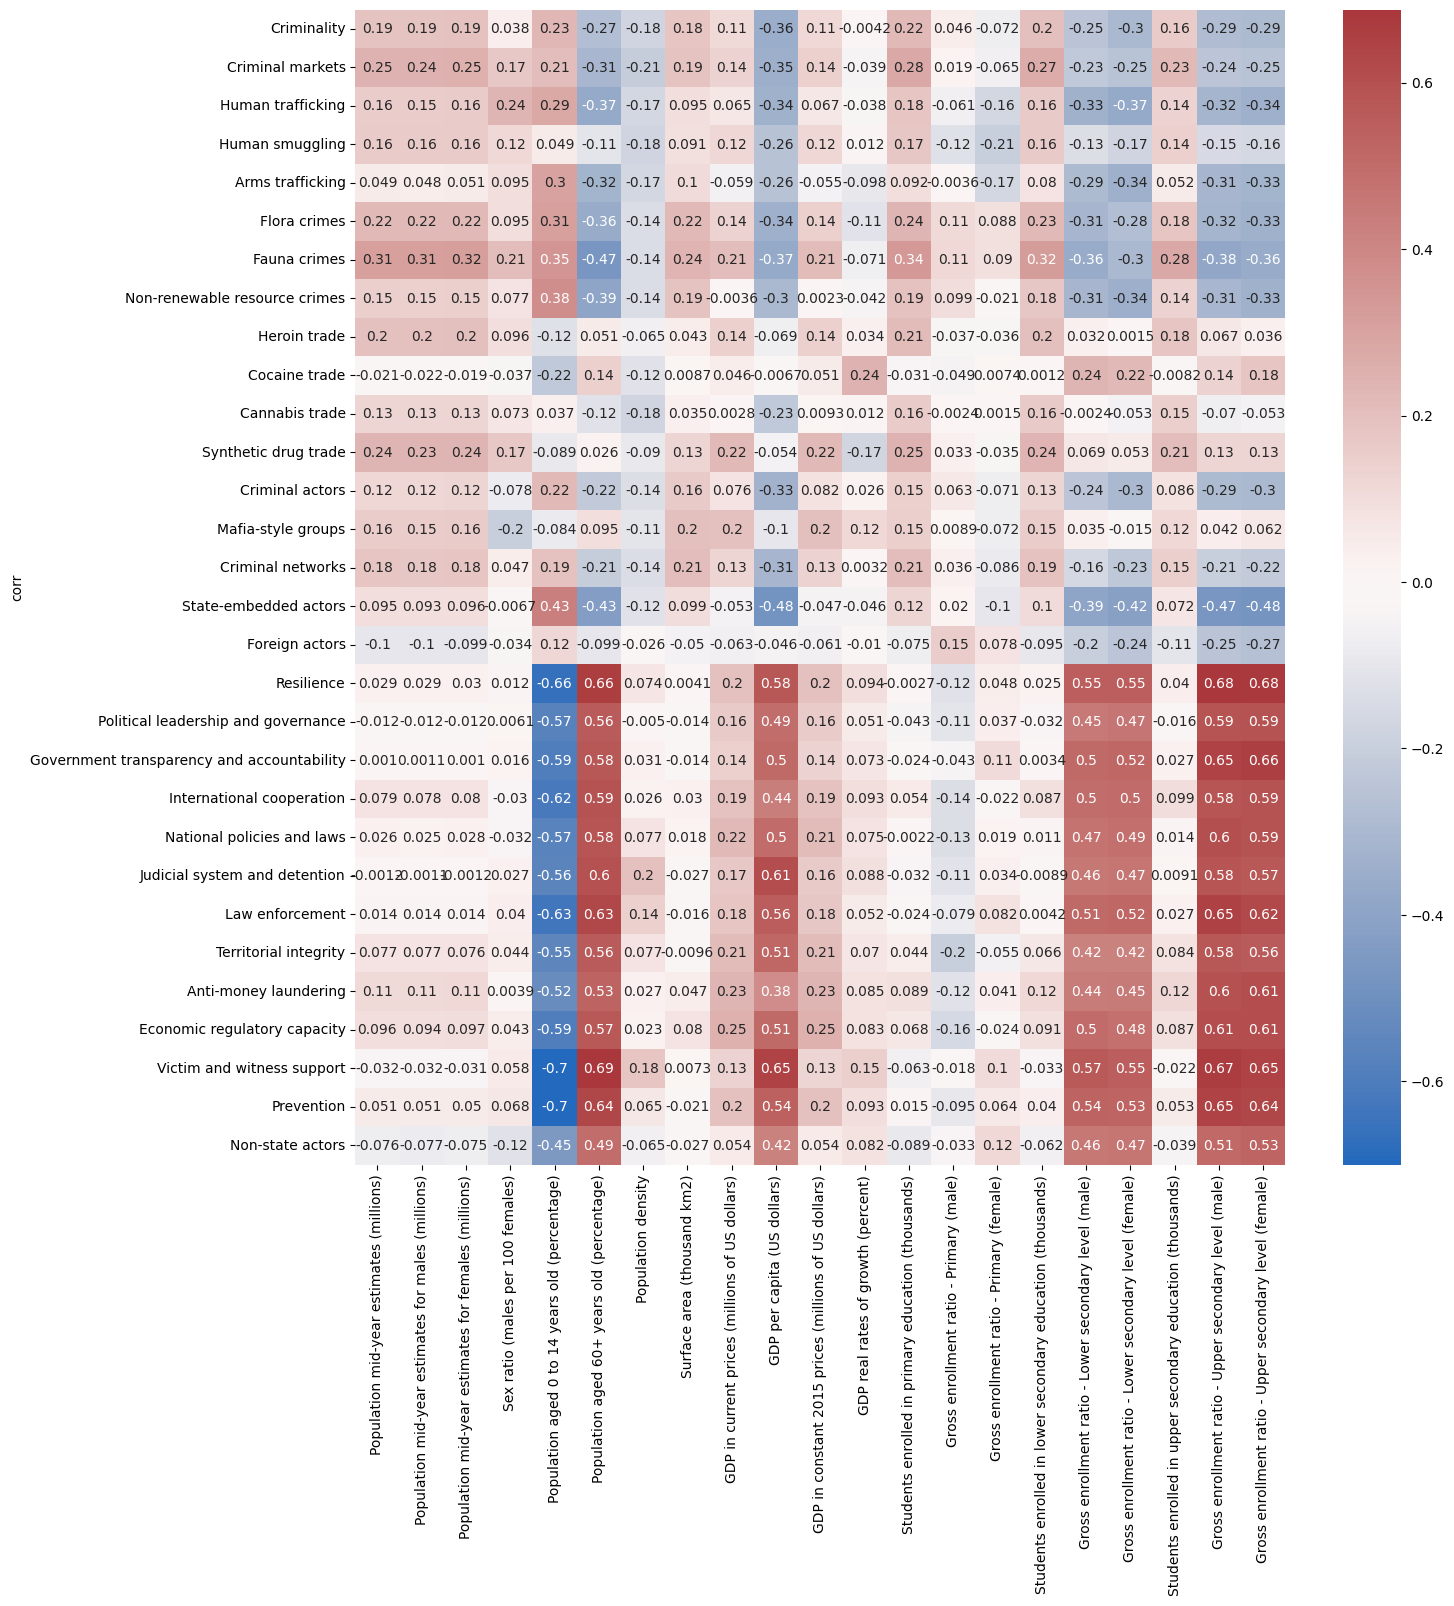

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(crime_corr(df_total_last), cmap="vlag",annot=True)

<Axes: ylabel='corr'>

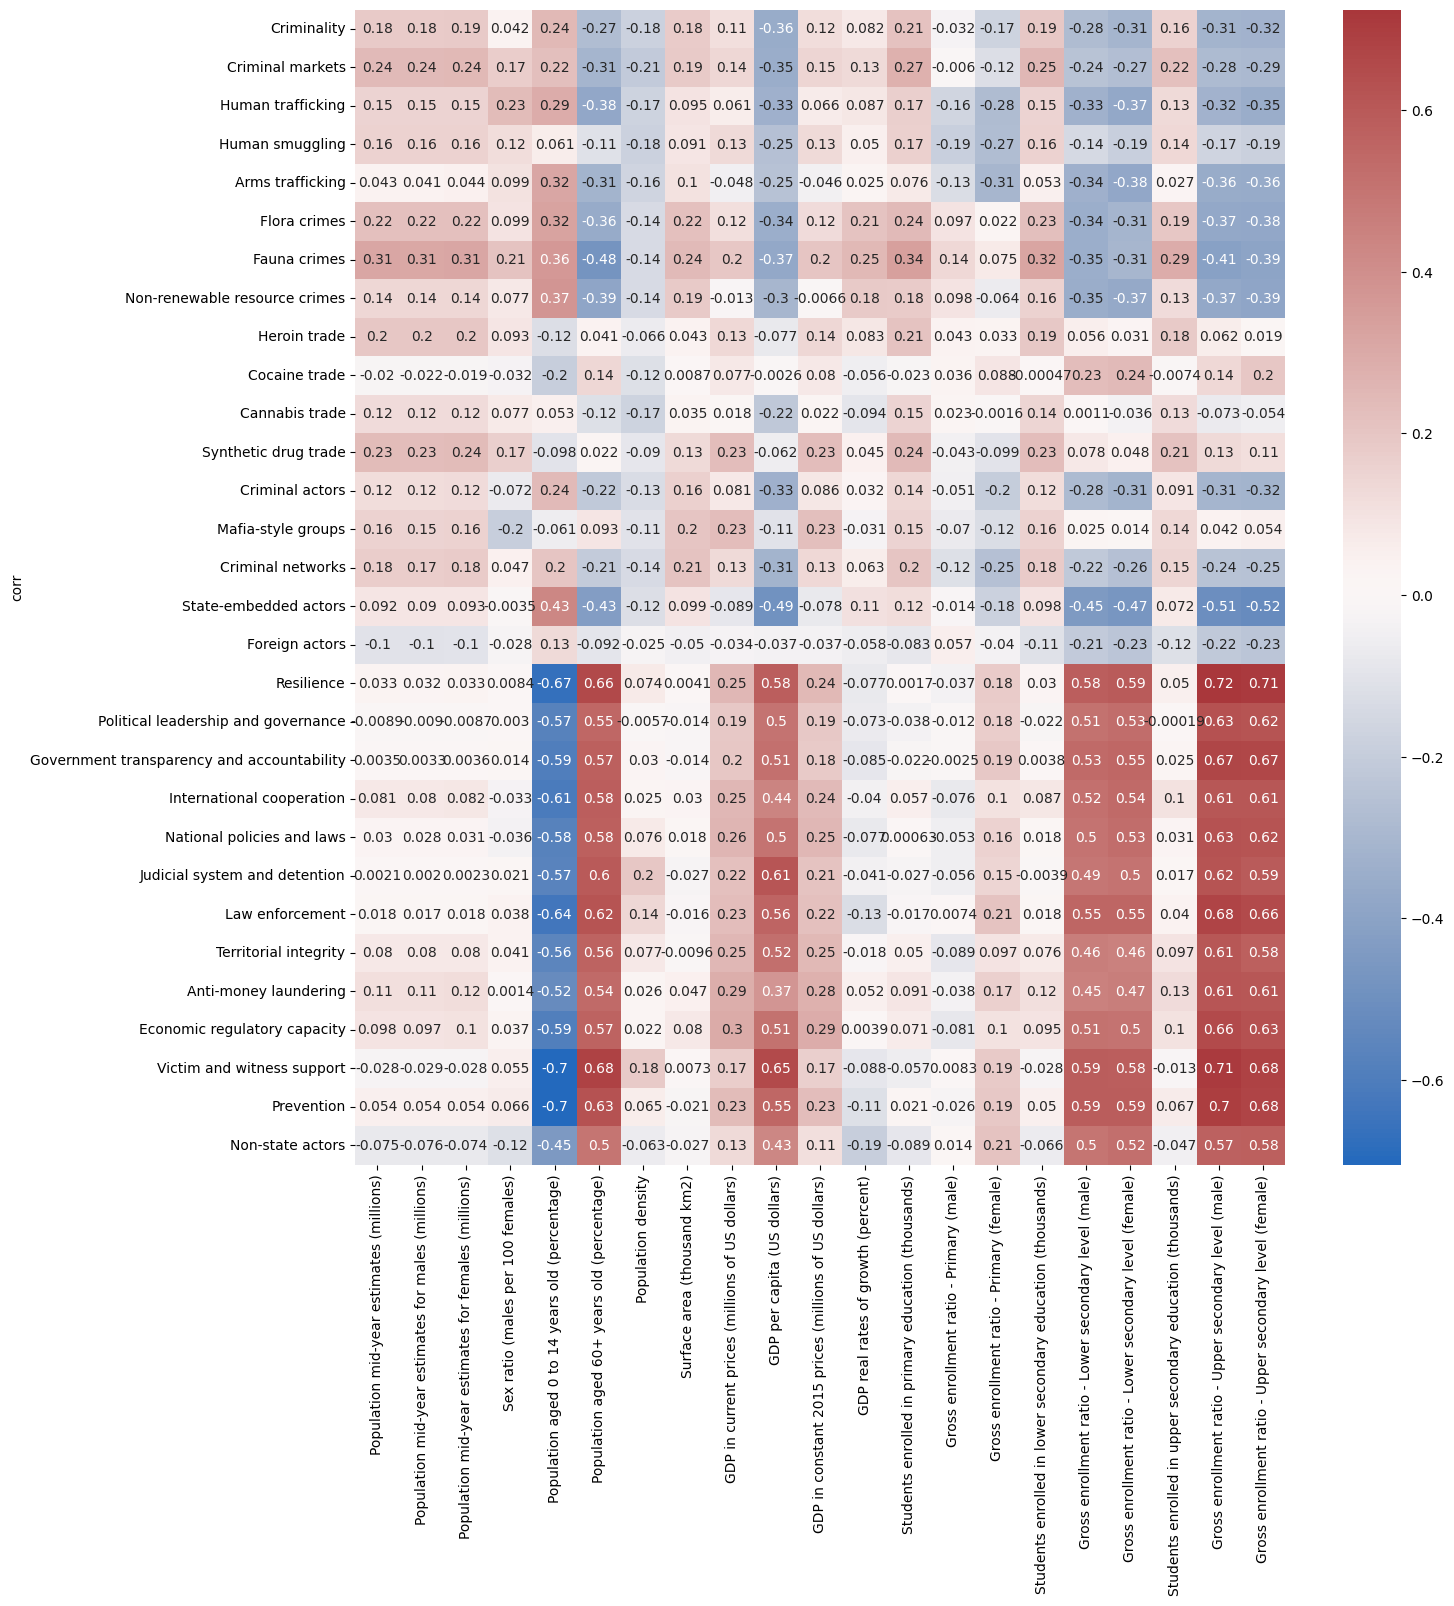

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(crime_corr(df_total_mean), cmap="vlag",annot=True)

<Axes: ylabel='corr'>

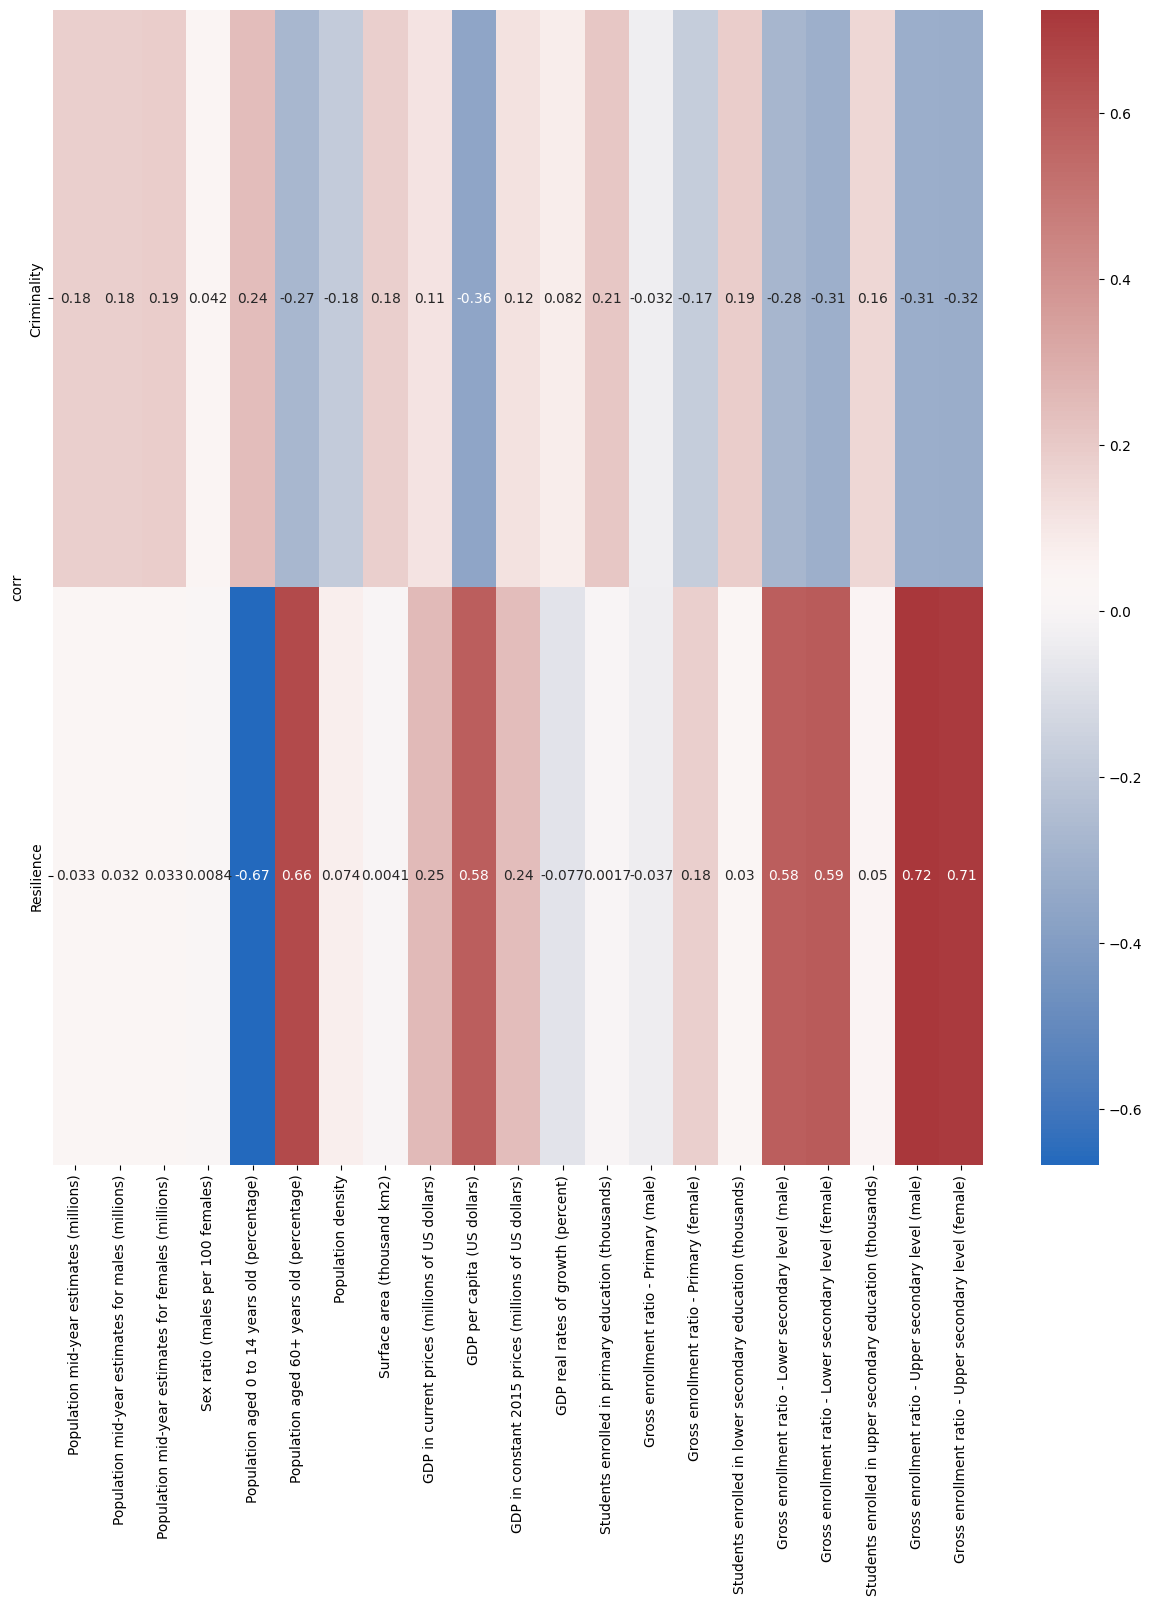

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(crime_corr(df_total_mean_res, col=2), cmap="vlag",annot=True)

## Finding and exploring outliers in the dataset:

### Per-Feature:

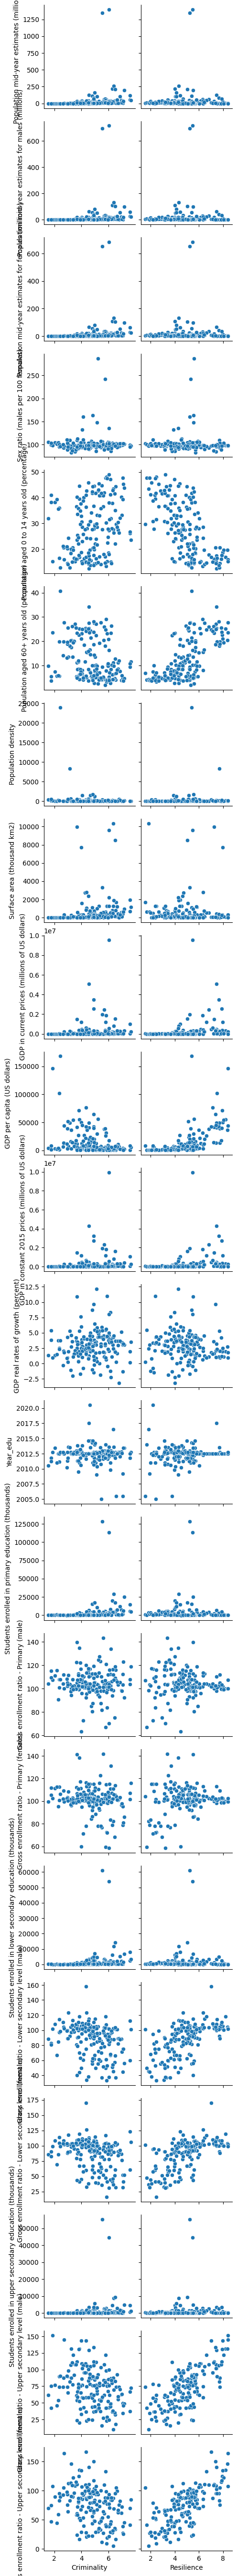

In [ ]:
data_curr = df_total_mean.select(pl.exclude(["Continent","Region","Country","Year_pop","Year_gdp"])).to_pandas()
sns.pairplot(
    data_curr,
    x_vars = data_curr.columns[[0, 17]],
    y_vars = data_curr.columns[30:],
)

### Using Isolation Forest:

In [ ]:
from sklearn.ensemble import IsolationForest
data_curr = df_total_mean_res.select(pl.exclude(["Continent","Region","Country","Year_pop","Year_gdp", "Year_edu"])).to_pandas()

model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.03),random_state=0)
model.fit(data_curr)

df_total_mean_res = df_total_mean_res.with_columns(pl.Series(model.predict(data_curr)).alias("IsoForestResult"))
df_total_mean_res = df_total_mean_res.select(pl.exclude(["Continent","Region","Year_pop","Year_gdp", "Year_edu"]))
df_total_mean_res

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


shape: (169, 25)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Country   ┆ Criminali ┆ Resilienc ┆ Populatio ┆ … ┆ Students  ┆ Gross enr ┆ Gross enr ┆ IsoFores │
│ ---       ┆ ty        ┆ e         ┆ n         ┆   ┆ enrolled  ┆ ollment   ┆ ollment   ┆ tResult  │
│ str       ┆ ---       ┆ ---       ┆ mid-year  ┆   ┆ in upper  ┆ ratio -   ┆ ratio -   ┆ ---      │
│           ┆ f64       ┆ f64       ┆ estimates ┆   ┆ secon…    ┆ Upper s…  ┆ Upper s…  ┆ i64      │
│           ┆           ┆           ┆ (m…       ┆   ┆ ---       ┆ ---       ┆ ---       ┆          │
│           ┆           ┆           ┆ ---       ┆   ┆ f64       ┆ f64       ┆ f64       ┆          │
│           ┆           ┆           ┆ f64       ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Denmark   ┆ 3.86      ┆ 8.21      ┆ 5.74      ┆ … ┆ 271.5     ┆ 131.425   ┆ 135.475   ┆ 1        │
│ Japan     ┆ 4.53      ┆ 7.46      ┆ 125.98    ┆ … ┆ 3589.0    ┆ 102.05    ┆ 102.75    ┆ -1       │
│ Italy     ┆ 5.81      ┆ 6.29      ┆ 59.5825   ┆ … ┆ 2814.0    ┆ 98.6      ┆ 98.725    ┆ 1        │
│ Portugal  ┆ 4.55      ┆ 6.46      ┆ 10.38     ┆ … ┆ 358.5     ┆ 104.675   ┆ 111.1     ┆ 1        │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ Rwanda    ┆ 3.68      ┆ 5.5       ┆ 12.2975   ┆ … ┆ 173.75    ┆ 23.85     ┆ 23.85     ┆ 1        │
│ El        ┆ 5.94      ┆ 3.71      ┆ 6.2475    ┆ … ┆ 207.4     ┆ 52.26     ┆ 54.76     ┆ 1        │
│ Salvador  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Brazil    ┆ 6.5       ┆ 5.04      ┆ 207.795   ┆ … ┆ 9405.2    ┆ 82.623127 ┆ 94.989806 ┆ -1       │
│ Lesotho   ┆ 3.9       ┆ 3.67      ┆ 2.1825    ┆ … ┆ 82.165539 ┆ 40.601165 ┆ 49.485986 ┆ 1        │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [ ]:
df_total_mean_res.filter(pl.col("IsoForestResult") == 1).select(pl.exclude(["IsoForestResult"])).write_parquet('clean_data.parquet')

In [ ]:
df_total_mean_res.filter(pl.col("IsoForestResult") == 1)

shape: (163, 25)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country ┆ Criminalit ┆ Resilienc ┆ Populatio ┆ … ┆ Students  ┆ Gross enr ┆ Gross enr ┆ IsoForest │
│ ---     ┆ y          ┆ e         ┆ n         ┆   ┆ enrolled  ┆ ollment   ┆ ollment   ┆ Result    │
│ str     ┆ ---        ┆ ---       ┆ mid-year  ┆   ┆ in upper  ┆ ratio -   ┆ ratio -   ┆ ---       │
│         ┆ f64        ┆ f64       ┆ estimates ┆   ┆ secon…    ┆ Upper s…  ┆ Upper s…  ┆ i64       │
│         ┆            ┆           ┆ (m…       ┆   ┆ ---       ┆ ---       ┆ ---       ┆           │
│         ┆            ┆           ┆ ---       ┆   ┆ f64       ┆ f64       ┆ f64       ┆           │
│         ┆            ┆           ┆ f64       ┆   ┆           ┆           ┆           ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Grenada ┆ 3.05       ┆ 4.67      ┆ 0.12      ┆ … ┆ 4.0       ┆ 98.58     ┆ 112.64    ┆ 1         │
│ Albania ┆ 5.63       ┆ 5.04      ┆ 2.87      ┆ … ┆ 136.25    ┆ 83.85     ┆ 80.05     ┆ 1         │
│ Burundi ┆ 4.51       ┆ 2.08      ┆ 11.325    ┆ … ┆ 157.0     ┆ 24.85     ┆ 22.325    ┆ 1         │
│ Sweden  ┆ 4.56       ┆ 7.46      ┆ 10.0625   ┆ … ┆ 450.5     ┆ 128.85    ┆ 140.85    ┆ 1         │
│ …       ┆ …          ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ Eritrea ┆ 4.34       ┆ 2.33      ┆ 3.4475    ┆ … ┆ 90.5      ┆ 36.375    ┆ 27.85     ┆ 1         │
│ Qatar   ┆ 5.21       ┆ 5.58      ┆ 2.3775    ┆ … ┆ 40.75     ┆ 92.419172 ┆ 93.64055  ┆ 1         │
│ Bahamas ┆ 3.79       ┆ 5.21      ┆ 0.395     ┆ … ┆ 14.666667 ┆ 77.880653 ┆ 81.477915 ┆ 1         │
│ Fiji    ┆ 3.9        ┆ 5.25      ┆ 0.92      ┆ … ┆ 51.705012 ┆ 75.470174 ┆ 87.029869 ┆ 1         │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

Per-Feature after Isolation Forest Filtering

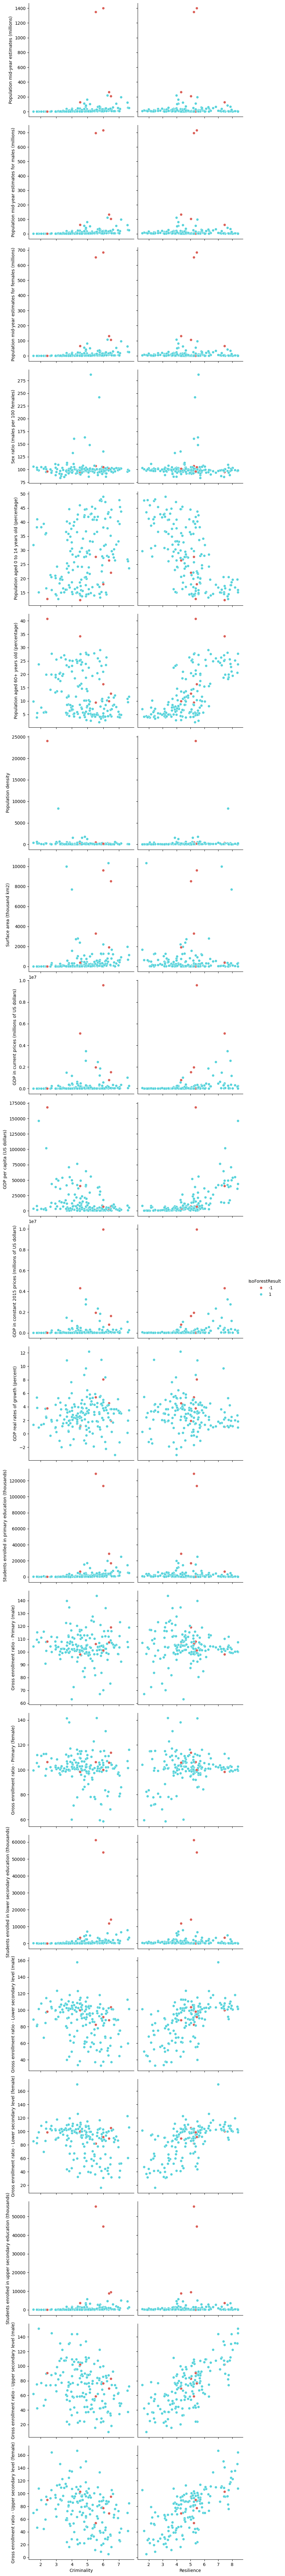

In [ ]:
data_curr = df_total_mean_res.to_pandas()
sns.pairplot(
    data_curr,
    x_vars = data_curr.columns[[1, 2]],
    y_vars = data_curr.columns[3:-1],
    hue = "IsoForestResult",
    palette = sns.color_palette("hls", 2),
    height = 4
)

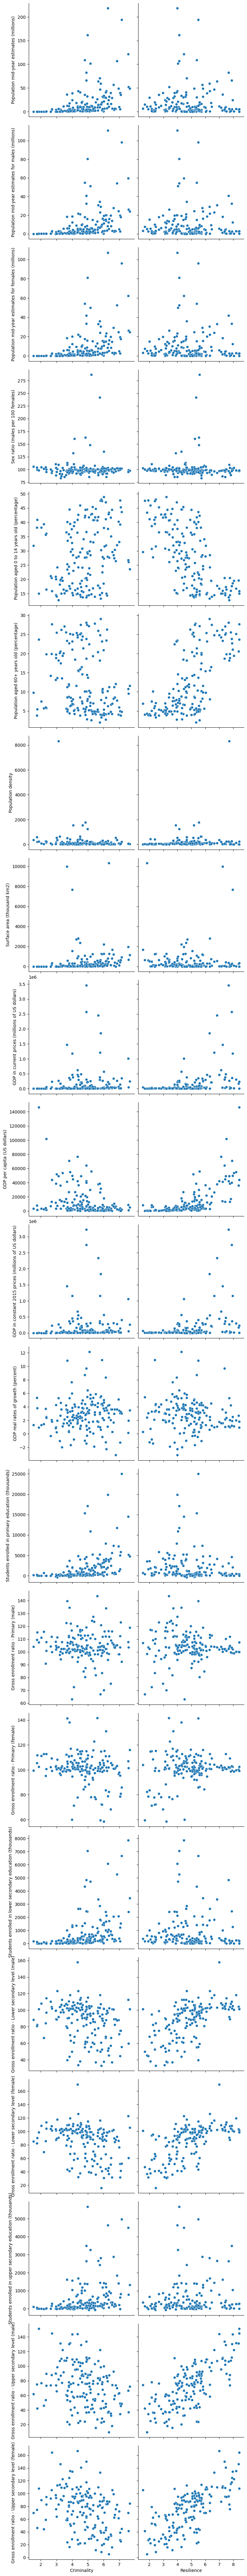

In [ ]:
data_curr = df_total_mean_res.filter(pl.col("IsoForestResult") == 1).to_pandas()
sns.pairplot(
    data_curr,
    x_vars = data_curr.columns[[1, 2]],
    y_vars = data_curr.columns[3:-1],
    height = 4
)

### Exploring Feature Selection Methods through correlation with the crime dataset and colinearity:

### Manual

In [ ]:
df_feature_selection = df_total_mean.drop(["Population mid-year estimates (millions)",
                                               "Population mid-year estimates for males (millions)",
                                               "Population mid-year estimates for females (millions)","Sex ratio (males per 100 females)",
                                               "Sex ratio (males per 100 females)",
                                               "Surface area (thousand km2)",
                                               "Students enrolled in primary education (thousands)",
                                               "Gross enrollment ratio - Primary (male)",
                                               "Students enrolled in lower secondary education (thousands)"])
df_feature_selection_res = df_total_mean_res.drop(["Population mid-year estimates (millions)",
                                               "Population mid-year estimates for males (millions)",
                                               "Population mid-year estimates for females (millions)","Sex ratio (males per 100 females)",
                                               "Sex ratio (males per 100 females)",
                                               "Surface area (thousand km2)",
                                               "Students enrolled in primary education (thousands)",
                                               "Gross enrollment ratio - Primary (male)",
                                               "Students enrolled in lower secondary education (thousands)"])

In [ ]:
def colinearity(df):
  X =df.drop(["Criminality", "Resilience","Continent","Region","Country","Year_pop","Year_gdp", "Year_edu"])
  Y = df.select(["Criminality", "Resilience"])
  corr = X.corr().to_pandas()
  corr["corr"] = corr.columns
  corr.set_index("corr",inplace=True)
  plt.figure(figsize=(10,10))
  sns.heatmap(corr, cmap="vlag",annot=True)

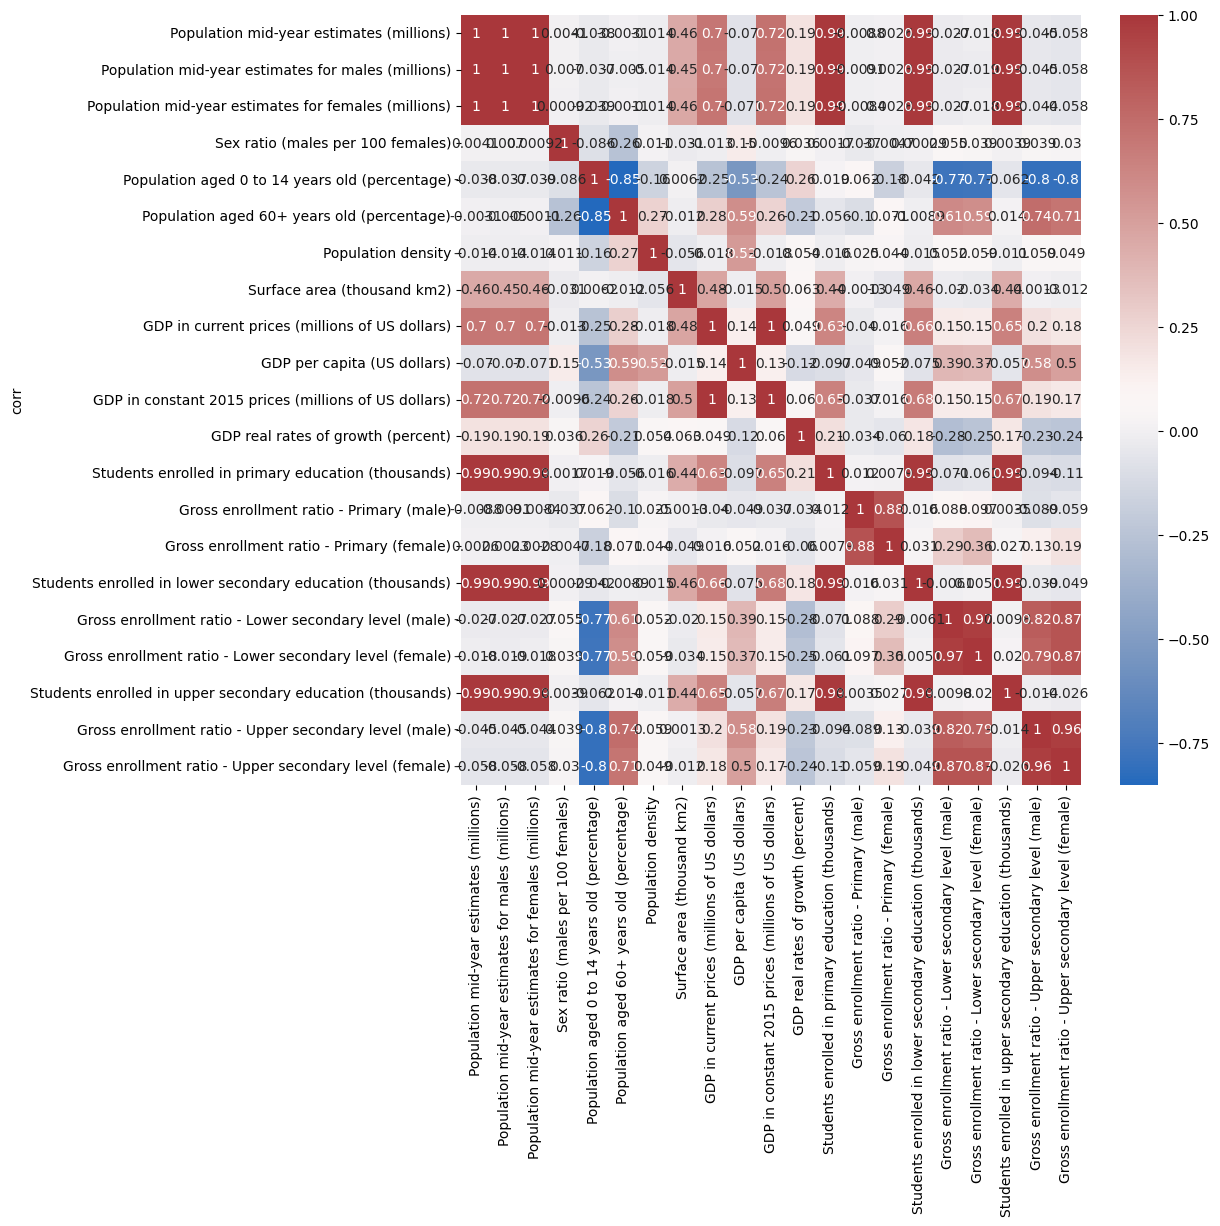

In [ ]:
colinearity(df_total_mean_res)

### Using Sequental Forward Feature Selection:

In [ ]:
X =df_total_mean_res.drop(["Criminality", "Resilience","Continent","Region","Country","Year_pop","Year_gdp", "Year_edu"])
Y = df_total_mean_res.select(["Criminality", "Resilience"])
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, Y)
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(X,Y)
X_selected = X[:,sfs_forward.get_support()]

In [ ]:
sfs_forward.get_feature_names_out()

array(['Sex ratio (males per 100 females)',
       'Population aged 0 to 14 years old (percentage)',
       'Population aged 60+ years old (percentage)',
       'Surface area (thousand km2)',
       'GDP real rates of growth (percent)',
       'Students enrolled in primary education (thousands)',
       'Gross enrollment ratio - Primary (male)',
       'Gross enrollment ratio - Primary (female)',
       'Students enrolled in upper secondary education (thousands)',
       'Gross enrollment ratio - Upper secondary level (male)'],
      dtype=object)

In [ ]:
df_selected_forward = df_total_mean_res.select(["Country", "Criminality", "Resilience",*sfs_forward.get_feature_names_out()])

In [ ]:
df_selected_forward.shape

(169, 13)

<Axes: ylabel='corr'>

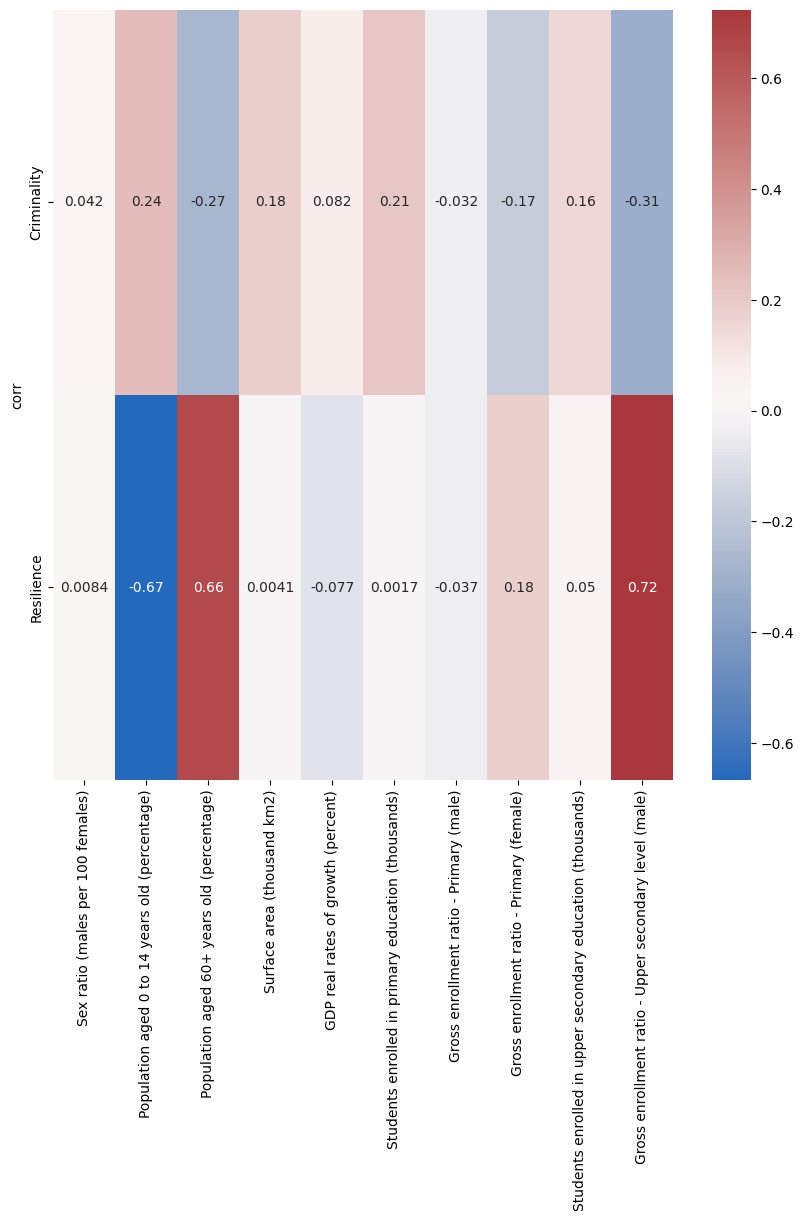

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_corr(df_selected_forward, 2), cmap="vlag",annot=True)

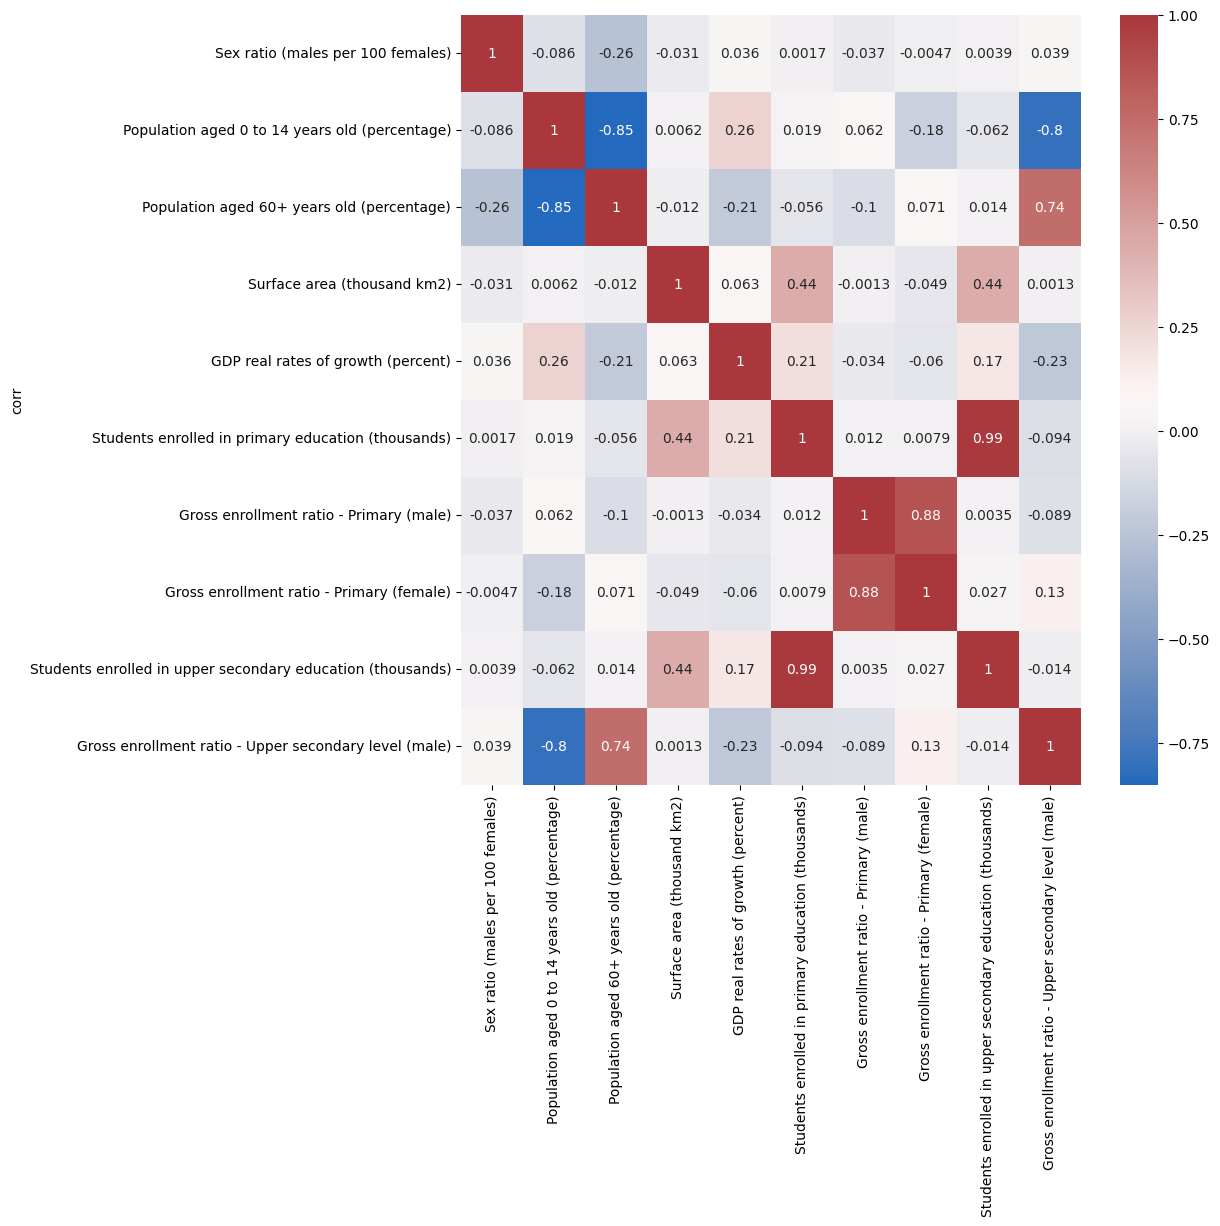

In [ ]:
colinearity(df_selected_forward)

(169, 19)


<Axes: ylabel='corr'>

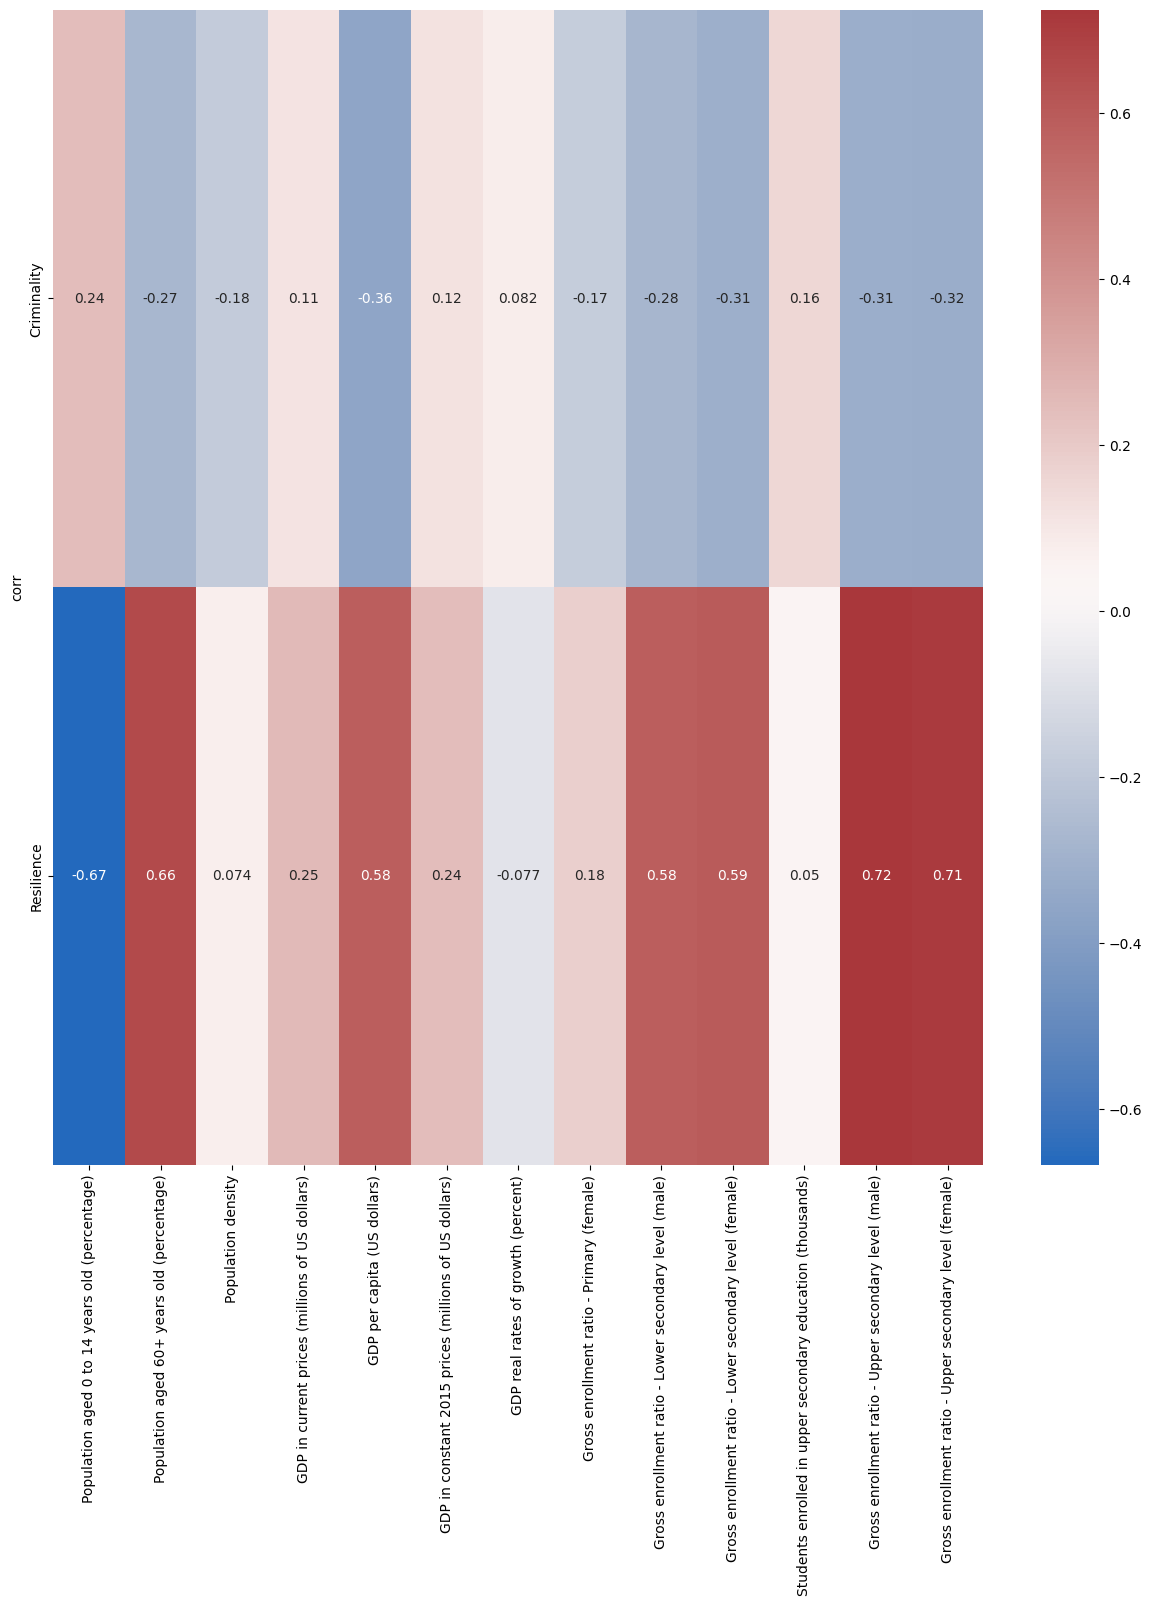

In [ ]:
print(df_feature_selection_res.drop(["Region","Continent"]).shape)
plt.figure(figsize=(15,15))
sns.heatmap(crime_corr(df_feature_selection_res, col=2), cmap="vlag",annot=True)

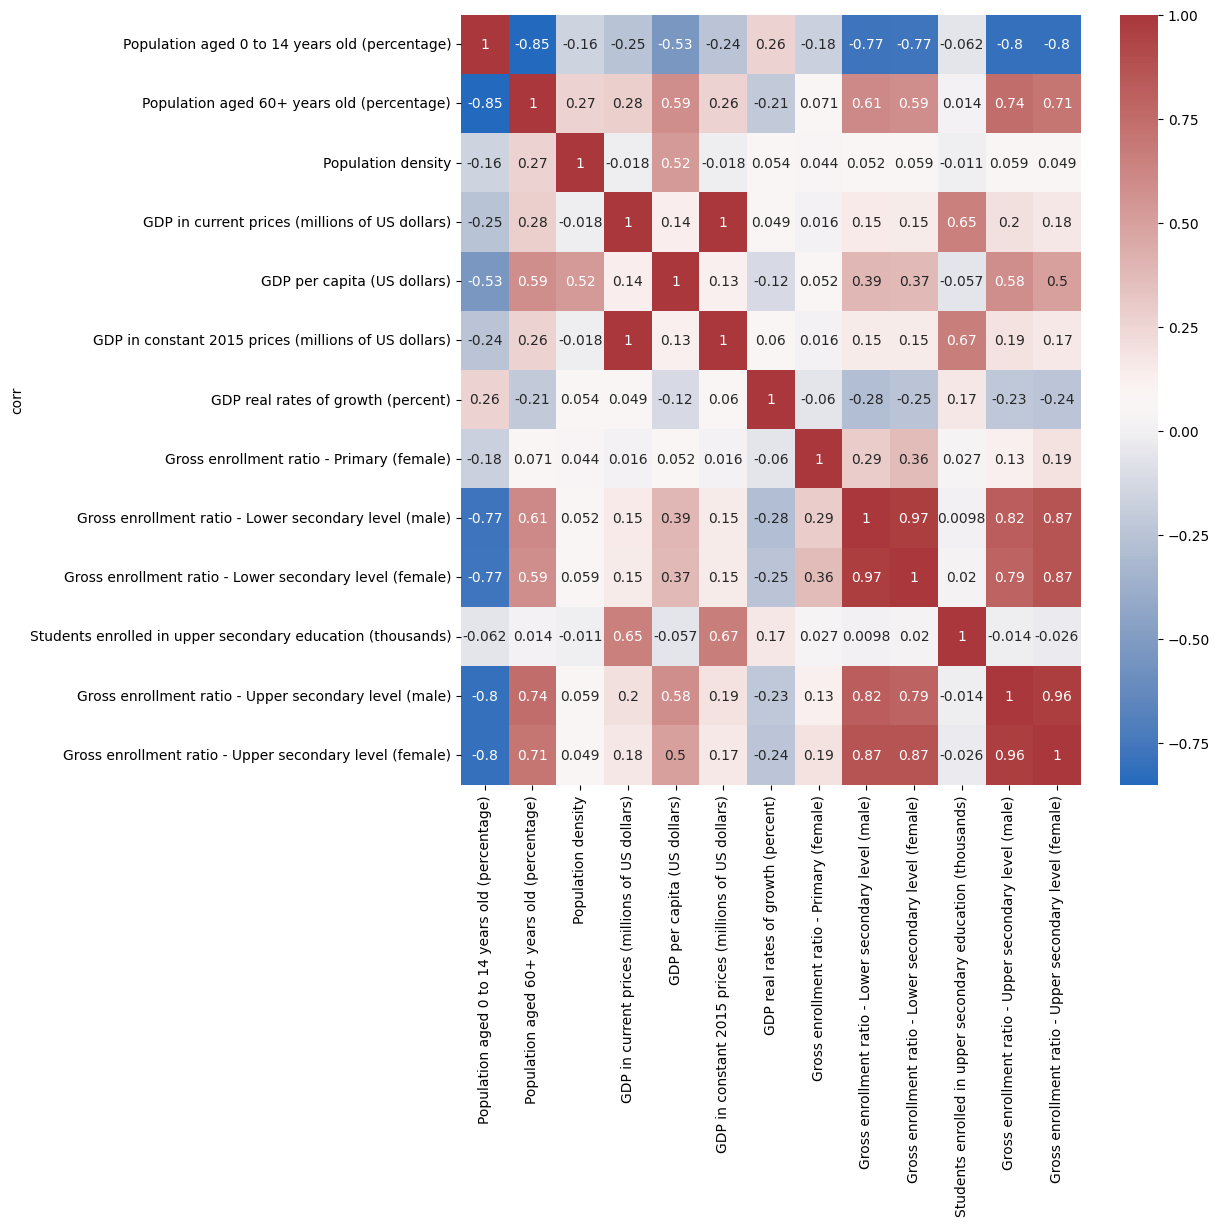

In [ ]:
colinearity(df_feature_selection_res)

<Axes: ylabel='corr'>

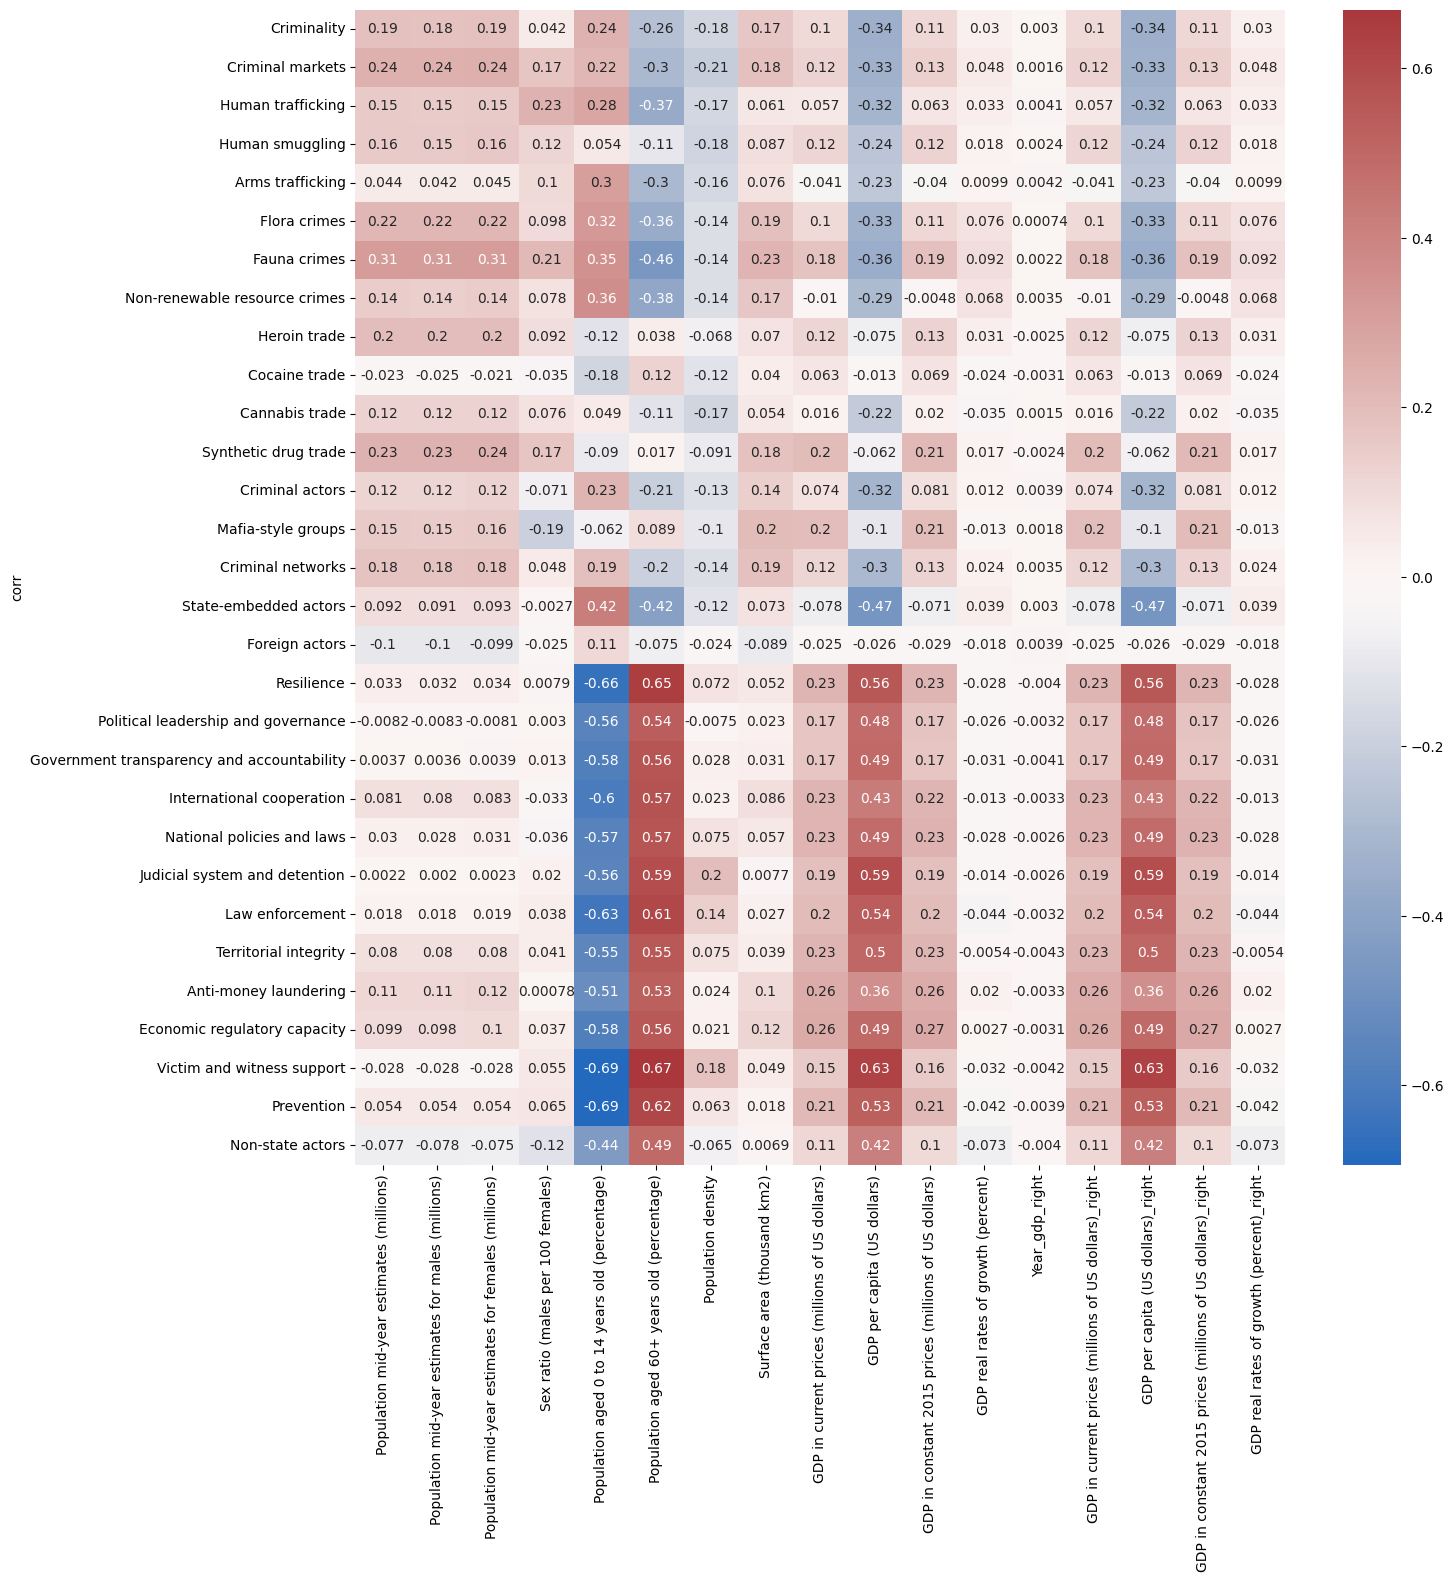

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(crime_corr(df_total), cmap="vlag",annot=True)

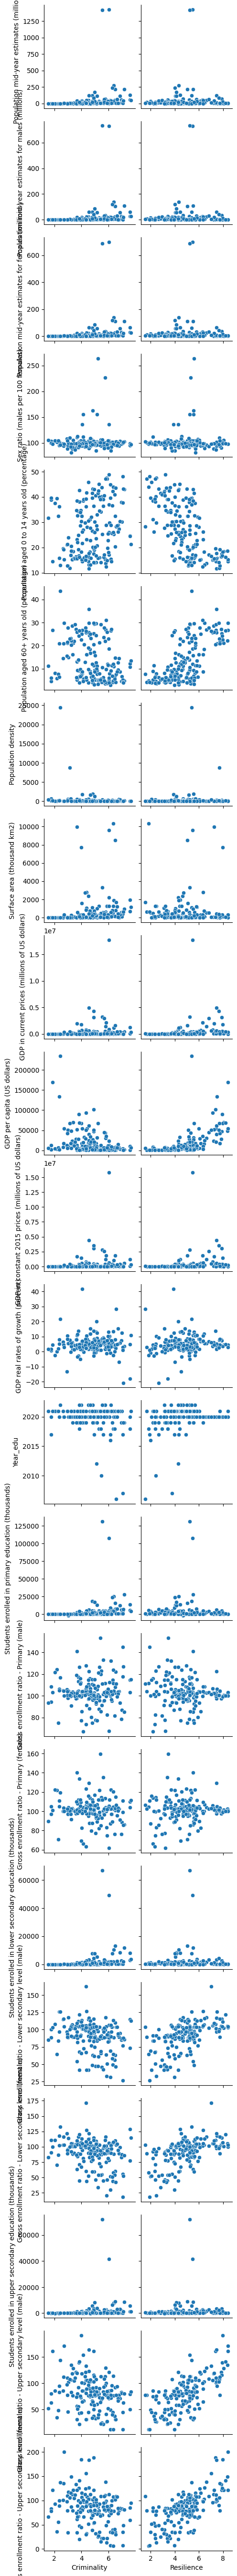

In [ ]:
data_curr = df_total_last.select(pl.exclude(["Continent","Region","Country","Year_pop","Year_gdp"])).to_pandas()
sns.pairplot(
    data_curr,
    x_vars = data_curr.columns[[0, 17]],
    y_vars = data_curr.columns[30:],
)

## Searching and exploring data biases:

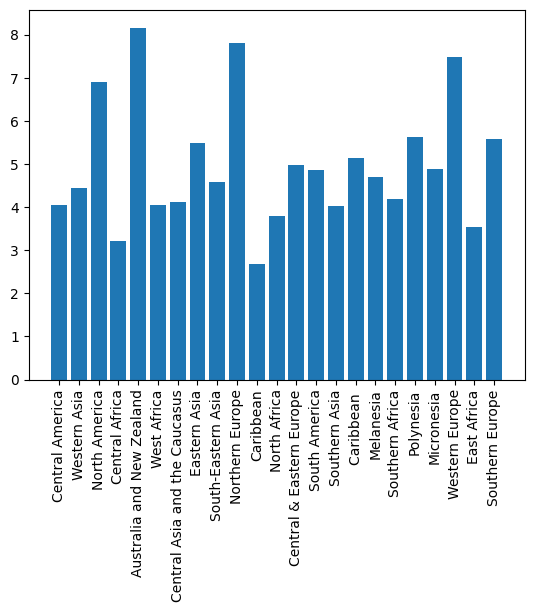

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = df_crime.group_by('Region').agg(pl.col("Resilience").mean())



plt.bar(x["Region"],x["Resilience"])
plt.xticks(
    rotation=90,
    fontweight='light',
)
plt.show()

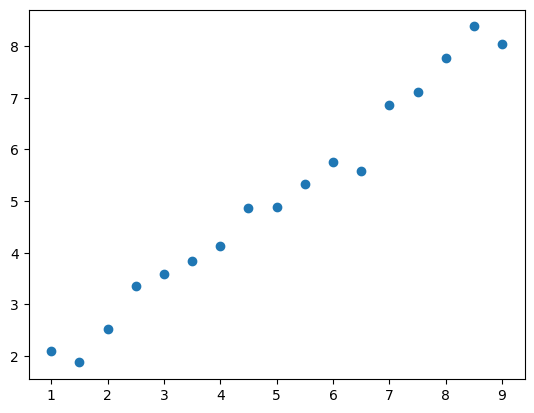

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = df_crime.group_by('Political leadership and governance').agg(pl.col("Resilience").mean())



plt.scatter(x["Political leadership and governance"],x["Resilience"])
plt.xticks(
    rotation=0,
    fontweight='light',
)
plt.show()

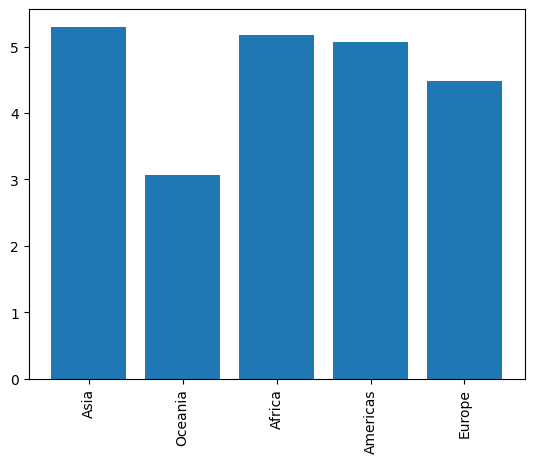

In [ ]:
x = df_crime.group_by('Continent').agg(pl.col("Criminality").mean())



plt.bar(x["Continent"],x["Criminality"])
plt.xticks(
    rotation=90,
    fontweight='light',
)
plt.show()

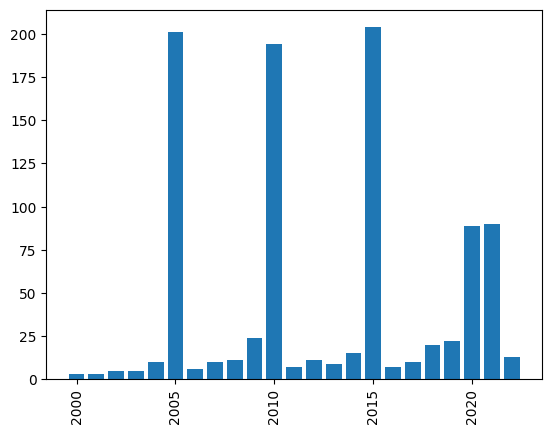

In [ ]:
year_dist = df_edu.group_by('Year_edu').count()
plt.bar(year_dist["Year_edu"],year_dist["count"])
plt.xticks(
    rotation=90,
    fontweight='light',
)
plt.show()

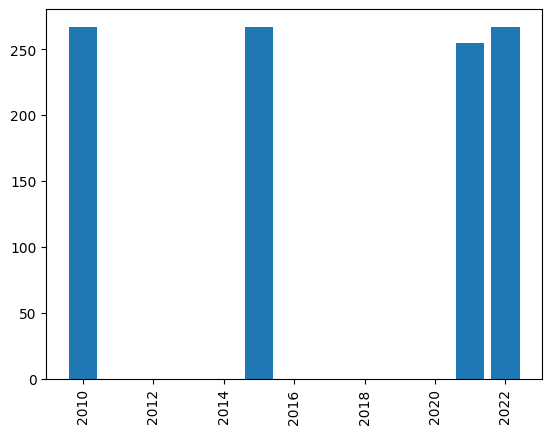

In [ ]:
year_dist = df_population.group_by('Year_pop').count()
plt.bar(year_dist["Year_pop"],year_dist["count"])
plt.xticks(
    rotation=90,
    fontweight='light',
)
plt.show()